In [1]:
# Importing required modules
import pandas as pd
import plotly.express as plx
import random

## Reading training data

In [2]:
train_df = pd.read_csv("./input/train.csv")

### Viewing the data

In [3]:
train_df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


### Descriptive statistics of training data

In [4]:
train_df.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,0013cc385424,91B1F82B2CF1,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


## Plotting Data by categories

### Visualizing the category data by Discourse_type
By seeing the plot , we can come to the conclusion of below points
* Claim and Evidance are higher than other categories. These 2 categories are ~3 times more than unique essays count.
* Not all the essays are having Lead and Concluding statement, which means that it will be essay can start and end with a Lead and Concluding statement.
* Rebuttal category is lowest number of records present in the training data


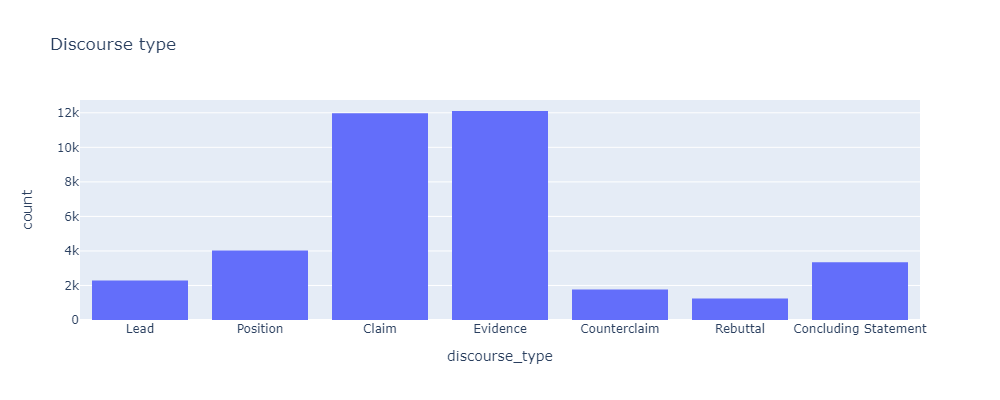

In [16]:
fig = plx.histogram(train_df,x='discourse_type',title="Discourse type")
fig.show(renderer="png",width=1000,height=400)  # use renderer mode for displaying in the saved notebook, for interactive mode dont need to specify anything

### Visualizing data by Target variable
Adequate is having highest number of records than the other categories

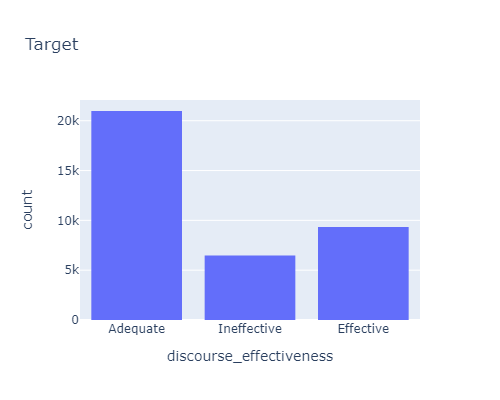

In [13]:
fig = plx.histogram(train_df,x='discourse_effectiveness',title="Target")
fig.show(renderer="png",width=500,height=400)

### Visualizing the Discourse type against Target variable

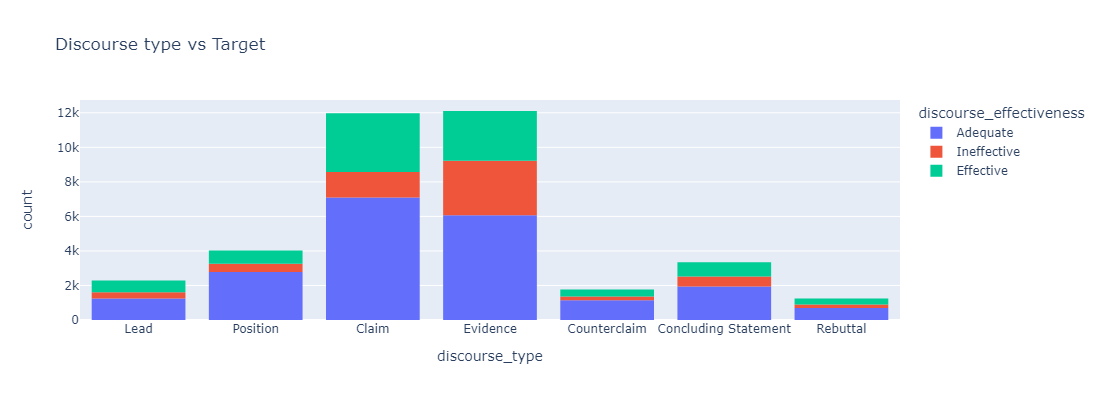

In [15]:
fig = plx.histogram(train_df,x='discourse_type',color='discourse_effectiveness',title="Discourse type vs Target")
fig.show(renderer="png",width=1100,height=400)

In [8]:
"""
Filtering the dataset by discourse text which are having the same value
Even though the text is same , it differs by discourse element against essay.
There are 74 rows of texts are having duplicate text.
"""
duplicate_rows = train_df[train_df.duplicated(['discourse_text'])]
duplicate_rows

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
1009,edf3ee8c1cee,130F9B6DCCF9,Summer projects should be teacher-designed,Position,Adequate
1552,cb2b1c856eee,1D7E734B4A3D,Summer projects should be teacher-designed,Position,Adequate
1758,690c9b7d12e8,20C01368FC3E,Summer projects should be student-designed,Position,Adequate
1932,248993ac2f7c,2352FF50900C,Summer projects should be student-designed,Position,Adequate
2643,3c57ee2d6ec6,2FF6C7542D18,Summer projects should be student-designed,Position,Adequate
...,...,...,...,...,...
35456,77fc6c349463,A814BD710140,Seeking multiple opinions can help someone mak...,Position,Adequate
35493,98510222f9b8,AB8EFBD82820,you can help others.,Claim,Adequate
35969,d9c17f7d8b7a,C8FB2508978A,"opinions,",Claim,Adequate
35973,9b72380e4fc2,C8FB2508978A,"opinions,",Claim,Ineffective


In [9]:
def get_text_by_essay(dataset):
    """
    Randomly Filter dataframe by unique essay id

    Args:
        dataset (DataFrame): Pandas DataFrame

    Returns:
        DataFrame : return dataframe by essay id
    """    
    id = random.randint(0,dataset.shape[0])
    essay_id = dataset.loc[id,'essay_id']
    df = dataset[dataset['essay_id'] == essay_id]
    return df.reset_index(drop=True)   

In [10]:
df_unique_essay_id = get_text_by_essay(train_df)
df_unique_essay_id

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,d47123facfb1,55B4B2BFF231,In this passage I personally think that he did...,Position,Adequate
1,e35cf13cb7da,55B4B2BFF231,He mad sure that he included everythings that ...,Evidence,Adequate
2,b0b8b7e52930,55B4B2BFF231,venus is earth sister,Claim,Adequate
3,bfe40e3ba6ac,55B4B2BFF231,NASA going to check out other planets,Claim,Adequate
4,ba01f4c89e0a,55B4B2BFF231,explain the planet to.,Claim,Adequate
5,c0c54e71d0f6,55B4B2BFF231,Venus is the sister ouf the plantet earth beca...,Claim,Adequate
6,985226d47d9e,55B4B2BFF231,What i mean to the closes is Venus could possi...,Evidence,Adequate
7,a4f3f435ea46,55B4B2BFF231,The NASA has talked about idea like sending hu...,Claim,Adequate
8,16e64eef1799,55B4B2BFF231,They talk about what they going to bring and h...,Evidence,Ineffective
9,b82b268e0613,55B4B2BFF231,This passage describe venus,Claim,Ineffective


In [11]:
def print_discourse_text(data):
    """
        Printing texts of an essay by row \n
        Discourse text,   Discourse type , Target value
        Ex: Well I have something to say. Aliens do not exist.  || Claim || Ineffective

    Args:
        data (DataFrame): Pandas Dataframe
    """    
    
    for index in range(data.shape[0]):
        print(data.loc[index,'discourse_text'] , data.loc[index,'discourse_type'], data.loc[index,'discourse_effectiveness'] ,sep=" || ")
        print("="*50)

In [12]:
print_discourse_text(df_unique_essay_id)

In this passage I personally think that he did an good job with this artical.  || Position || Adequate
He mad sure that he included everythings that he needed to put in the artical.  || Evidence || Adequate
venus is earth sister  || Claim || Adequate
NASA going to check out other planets  || Claim || Adequate
explain the planet to.  || Claim || Adequate
Venus is the sister ouf the plantet earth because its to closes to earth.  || Claim || Adequate
What i mean to the closes is Venus could possible be another earth because it has the same features and it may well once have been the most earth - like plantet in our solar system, and in terms of density and size and occasionally the closest in distance too.

Earth is closes to venus and mars but orbit the sun at different speeds means sometimes we are closer to mar and sometime venus.  || Evidence || Adequate
The NASA has talked about idea like sending humans to study venus.  || Claim || Adequate
They talk about what they going to bring an